In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.26/04


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/DQ_250GeV_ss.minp10.distcut.polar.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/DQ_250GeV_ss.minp10.distcut.polar.true.root")
# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp10maxp60.hit210.offset.dEdxMin.root")
# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp10maxp60.hit210.offset.dEdxMin.cheat.root")

file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.OppKMult.KPicross.K_cos.AllEvents.root")


In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]
    
def Normal(h1):
    h1.Scale(1.0/h1.GetEntries())
    
def Normal2(h1):
    h1.Scale(1.0/h1.Integral(12,88))

In [5]:
TFile.GetKeyNames = GetKeyNames
keyList = file1.GetKeyNames()
print(keyList)

['h_cnt_nevents', 'h_cnt_nevents_KPi', 'h_cnt_ISRevents', 'h_mc_stable_nKaons_evt', 'h_mc_quark_cos', 'h_mc_qq_TotE', 'h_mc_qq_InvM', 'h_mc_visibleE', 'h_mc_QQsep', 'h_pfo_visibleE', 'h_pfo_Jetsep', 'h_pfo_jet_TotE', 'h_pfo_jet_InvM', 'h_pfo_pv_kaon', 'h_pfo_pv_pion', 'h_pfo_pv_proton', 'h_pfo_neu_E', 'h_pfo_neu_p', 'h_pfo_neu_E_wrong', 'h_pfo_neu_p_wrong', 'h_pfo_neu_E_correct', 'h_pfo_neu_p_correct', 'h_pfo_kdEdx_dist_kaon', 'h_pfo_kdEdx_dist_proton', 'h_pfo_kdEdx_dist_pion', 'h_pfo_kdEdx_dist_electron', 'h_pfo_kdEdx_dist_muon', 'h_pfo_kdEdx_dist_others', 'h_pfo_pidEdx_dist_kaon', 'h_pfo_pidEdx_dist_proton', 'h_pfo_pidEdx_dist_pion', 'h_pfo_pidEdx_dist_electron', 'h_pfo_pidEdx_dist_muon', 'h_pfo_pidEdx_dist_others', 'h_pfo_pdEdx_dist_kaon', 'h_pfo_pdEdx_dist_proton', 'h_pfo_pdEdx_dist_pion', 'h_pfo_pdEdx_dist_electron', 'h_pfo_pdEdx_dist_muon', 'h_pfo_pdEdx_dist_others', 'h_pfo_LeadKaons_cos', 'h_pfo_LeadKaons_cos_kaon', 'h_pfo_LeadKaons_cos_proton', 'h_pfo_LeadKaons_cos_pion', 'h_pf

In [6]:
h_pfo_LeadK_p_wrong = file1.Get("h_pfo_LeadK_p_wrong")
h_pfo_LeadK_p_correct = file1.Get("h_pfo_LeadK_p_correct")

In [7]:
c1 = TCanvas("c1","c1",500,500)

In [8]:
# h_pfo_LeadK_p_wrong.GetXaxis().SetRangeUser(10,60)
# h_pfo_LeadK_p_wrong.GetYaxis().SetRangeUser(10,60)

h_pfo_LeadK_p_wrong.Draw("colz")

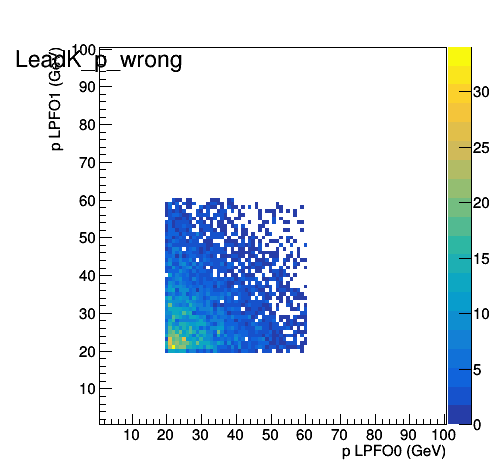

In [9]:
c1.Draw()

In [10]:
h_LPFO_p_wrong = TH1F("h_LPFO_p_wrong","h_LPFO_p_wrong",100,0.5,100.5)

In [11]:
h_LPFO0_p_wrong = h_pfo_LeadK_p_wrong.ProjectionX()
h_LPFO1_p_wrong = h_pfo_LeadK_p_wrong.ProjectionY()
h_LPFO_p_wrong.Add(h_LPFO0_p_wrong,h_LPFO1_p_wrong)

makePretty(h_LPFO0_p_wrong,kRed+1)
makePretty(h_LPFO1_p_wrong,kBlue+1)
makePretty(h_LPFO_p_wrong,kGreen+1)

In [12]:
Normal(h_LPFO0_p_wrong)
Normal(h_LPFO1_p_wrong)
Normal(h_LPFO_p_wrong)

In [13]:
c11 = TCanvas("c11","c11",500,500)

In [14]:
h_LPFO0_p_wrong.Draw("h")
h_LPFO1_p_wrong.Draw("hsame")
# h_LPFO_p_wrong.Draw("hsame")

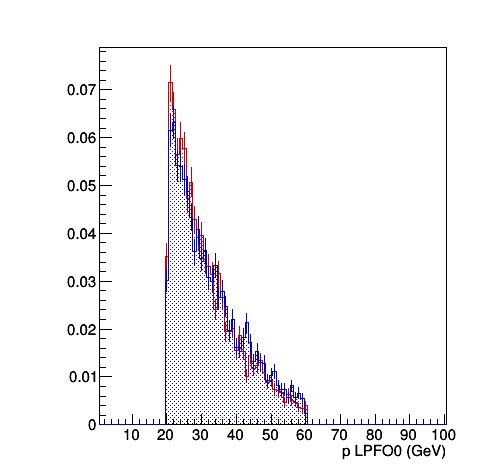

In [15]:
c11.Draw()

In [16]:
c2 = TCanvas("c2","c2",500,500)

In [17]:
# h_pfo_LeadK_p_correct.GetXaxis().SetRangeUser(10,60)
# h_pfo_LeadK_p_correct.GetYaxis().SetRangeUser(10,60)

h_pfo_LeadK_p_correct.Draw("colz")

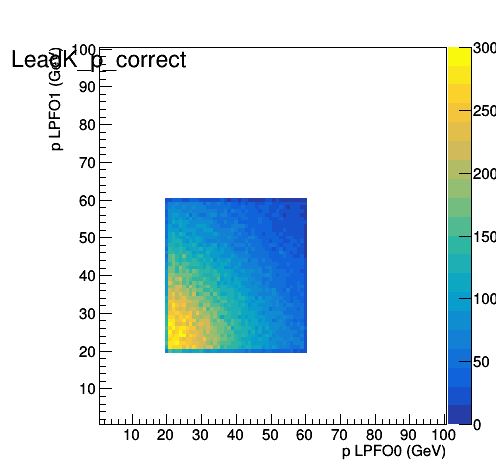

In [18]:
c2.Draw()

In [19]:
h_LPFO_p_correct = TH1F("h_LPFO_p_correct","h_LPFO_p_correct",100,0.5,100.5)

In [20]:
h_LPFO0_p_correct = h_pfo_LeadK_p_correct.ProjectionX()
h_LPFO1_p_correct = h_pfo_LeadK_p_correct.ProjectionY()

h_LPFO_p_correct.Add(h_LPFO0_p_correct,h_LPFO1_p_correct)

makePretty(h_LPFO0_p_correct,kRed+1)
makePretty(h_LPFO1_p_correct,kBlue+1)
makePretty(h_LPFO_p_correct,kViolet+1)

In [21]:
Normal(h_LPFO0_p_correct)
Normal(h_LPFO1_p_correct)
Normal(h_LPFO_p_correct)

In [22]:
c21 = TCanvas("c21","c21",500,500)

In [23]:
h_LPFO_p_wrong.GetXaxis().SetRangeUser(10,60)
h_LPFO_p_correct.GetXaxis().SetRangeUser(10,60)

h_LPFO_p_wrong.SetTitle(";p (GeV);Events Normalized")

In [24]:
# h_LPFO0_p_correct.Draw("h")
# h_LPFO1_p_correct.Draw("hsame")
h_LPFO_p_wrong.Draw("h")
h_LPFO_p_correct.Draw("hsame")

In [25]:
leg = TLegend(0.5,0.85,0.75,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.03)
leg.AddEntry(h_LPFO_p_correct,"Correct","fp")
leg.AddEntry(h_LPFO_p_wrong,"Migration","fp")
leg.Draw()

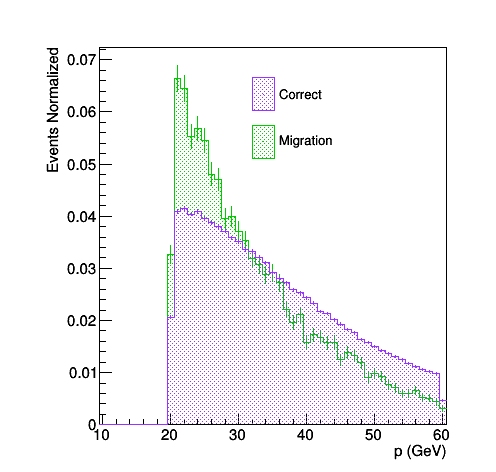

In [26]:
c21.Draw()